In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd
import FinanceDataReader as fdr

In [2]:
# 삼성전자, 2017년~현재 일별 시세 받아오기
# 삼성전자의 종목 번호 '005930'
df = fdr.DataReader('005930', "2017", "2021")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


<Axes: xlabel='Date'>

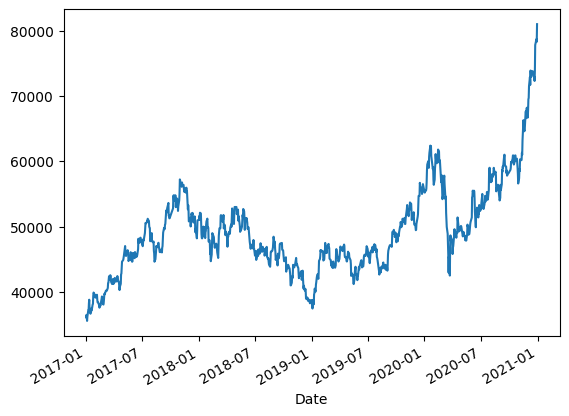

In [3]:
df["Close"].plot()

## 상장종목 목록 가져오기

In [4]:
# 이전 강의에서 저장해 놓았던 csv 파일로 분석을 합니다.
# colab 사용자의 경우 이미 csv 파일이 지워졌을 수 있기 때문에 파일이 없을 경우 아래 셀에서 다시 load하면 됩니다.
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(2646, 9)

In [5]:
# 위 CSV 파일이 로드되지 않아 당황스러우신가요? 그럼 아래 주석을 풀고 다시 KRX 데이터를 받아오세요.
# colab의 경우 일정 시간이 지나면 런타임이 초기화 되기 때문에 다시 로드하면 데이터를 가져올 수 있습니다.
# df_krx = fdr.StockListing('KRX')

## 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장종목 목록을 사용합니다.

In [6]:
# DataFrame 에 어떤 데이터가 들어있는 head()로 일부 데이터만 가져와 봅니다.
df_krx[["Symbol", "Name"]].head()

,Symbol,Name
0,432720,퀄리타스반도체
1,351020,미쥬
2,396470,워트
3,246250,에스엘에스바이오
4,416180,신성에스티


<font color="red">빅히트 사명이 하이브로 변경되었습니다. 하이브로 실습해 주세요.</font>

In [7]:
# df_krx의 Name column 에서 '하이브'에 해당하는 row를 전부 가져오는데 Name column만 가져와
# list 형태로 index 번호는 빼고 ['하이브'] 만 가져오게 되고 [0]을 통해 list에 있는 string만 가져오게 됩니다.
# 하이브 (series) -> ['하이브'] (list) -> '하이브' (string)
item_name = "하이브"
df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()[0]

352820

## 종목명으로 종목 코드를 받아오는 함수 만들기

In [8]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.

def item_code_by_item_name(item_name):
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return str(item_code)
    else:
        return False

In [9]:
item_code_by_item_name("하이브")

'352820'

In [10]:
# 네이버로 등록된 상장사는 없습니다.
# 잘못 입력된 텍스트에 대해 예외처리를 하는지 확인합니다.
item_code_by_item_name("네이버")

False

In [11]:
# 네이버는 NAVER로 등록되어 있습니다.
item_code_by_item_name("NAVER")

'35420'

In [12]:
# 삼성전자
item_code_by_item_name("삼성전자")

'5930'

In [13]:
# 셀트리온과 카카오게임즈도 확인하여 봅니다.
item_code_by_item_name("셀트리온")

'68270'

In [14]:
item_code_by_item_name("카카오게임즈")

'293490'

In [15]:
fdr.DataReader(item_code_by_item_name("하이브"))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-10-26,221500,222000,202000,204000,894408,-0.107221
2023-10-27,210000,218500,209000,212000,312497,0.039216
2023-10-30,210000,222000,210000,219500,144405,0.035377


## 종목명으로 일별시세를 받아오는 함수 만들기

In [16]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택

def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [17]:
find_item_list("하이브")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-10-26,221500,222000,202000,204000,894408,-0.107221
2023-10-27,210000,218500,209000,212000,312497,0.039216
2023-10-30,210000,222000,210000,219500,144405,0.035377


### 종목명으로 일별 시세를 잘 가져오는지 확인하기

In [18]:
# LG화학의 데이터를 가져옵니다.
find_item_list("LG화학")

"51910" invalid symbol or has no data


""


In [19]:
# 빅히트의 데이터를 가져옵니다.
# stock_daily 변수에 담습니다.
stock_daily = find_item_list("하이브")
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2023-10-26,221500,222000,202000,204000,894408,-0.107221
2023-10-27,210000,218500,209000,212000,312497,0.039216
2023-10-30,210000,222000,210000,219500,144405,0.035377


## 개별종목 시세 시각화
### pandas 의 plot으로 시각화 하기

<Axes: xlabel='Date'>

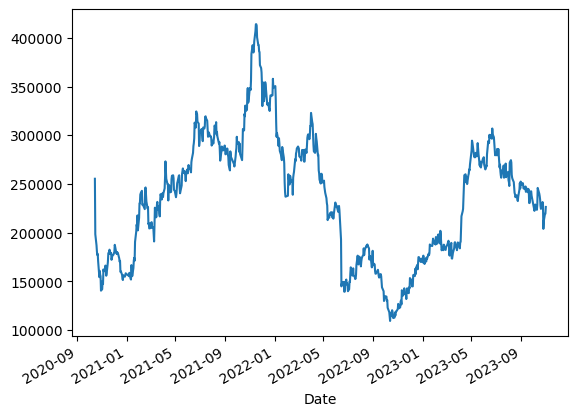

In [20]:
# stock_daily 변수에 할당된 수집된 데이터의 종가 그래프를 그립니다.
stock_daily["Close"].plot()

<Axes: xlabel='Date'>

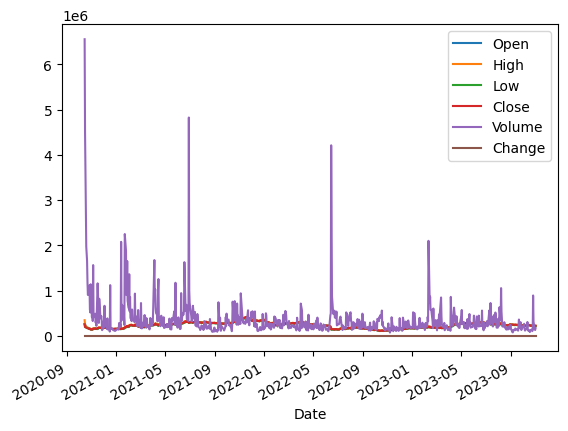

In [21]:
# 전체 데이터프레임을 plot() 으로 시각화 하면 수치 데이터 전체를 선그래프로 그립니다.
stock_daily.plot()

### 서브플롯 그리기

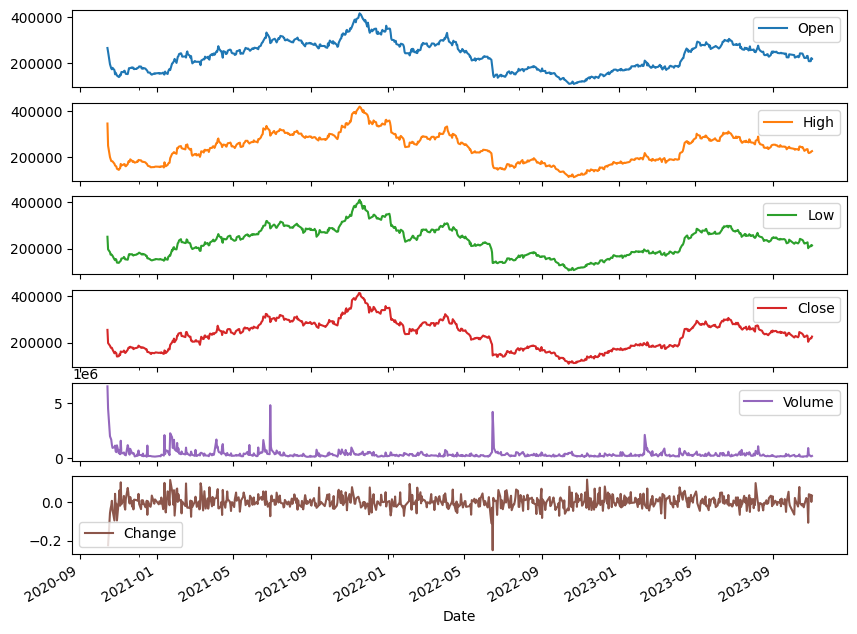

In [22]:
# 수집한 종목의 선그래프를 Pandas 로 그립니다.
# 스케일이 다르기 때문에 subplots를 사용해 그려봅니다.
g = stock_daily.plot(subplots=True, figsize=(10, 8))

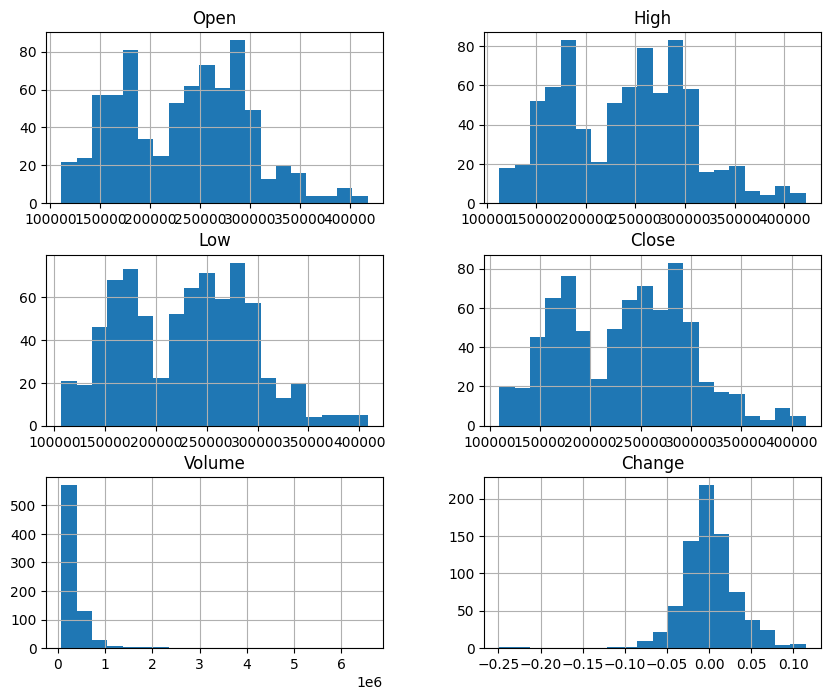

In [23]:
# 히스토그램 그리기
h = stock_daily.hist(figsize=(10, 8), bins=20)

### 2축 그래프 그리기

<Axes: xlabel='Date'>

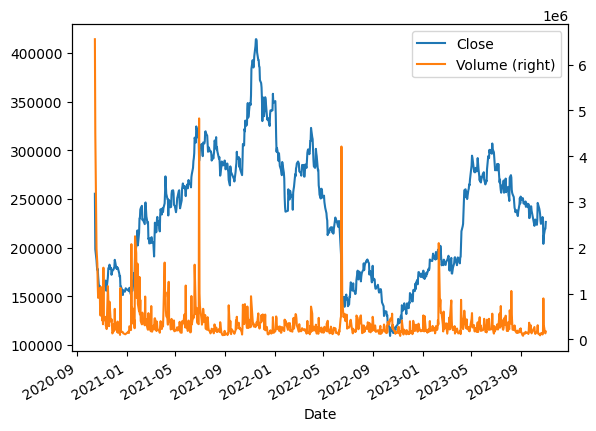

In [24]:
# secondary_y 옵션을 통한 종가와 거래량에 대한 2축 그래프 그리기
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

In [25]:
format(1e6, ",")

'1,000,000.0'

In [26]:
format(10**6,",")

'1,000,000'

In [27]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02,752.000000
mean,234009.808765,239449.003984,228895.841965,233703.439575,3.553592e+05,0.000423
std,64021.234146,65015.784053,62726.447341,63792.657102,4.498022e+05,0.033798
min,111000.000000,113000.000000,107000.000000,109500.000000,7.409200e+04,-0.248705
25%,177000.000000,181170.000000,173250.000000,177200.000000,1.735530e+05,-0.018519
50%,241065.000000,246000.000000,236000.000000,240570.000000,2.424910e+05,0.000000
75%,281000.000000,287000.000000,276500.000000,281000.000000,3.937210e+05,0.017809
max,418000.000000,421500.000000,408500.000000,414000.000000,6.557212e+06,0.114625
